# Deep Neural Network 

Deep Neural Networks are pretty cool for a lot of applications. Here, I am trying to code it myself from my understanding from Professor Ng's course in Coursera and Stanford. The problem is a pretty standard one: classification of numbers. The numbers and labels are provided by NIST.

It can be easily pulled from the TensorFlow Keras library. It is also availble on [Professor Yann LeCun's website](http://yann.lecun.com/exdb/mnist/).

In [1]:
import numpy as np
import tensorflow as tf
import struct as st
import matplotlib.pyplot as plt
import copy
%matplotlib inline
np.set_printoptions(threshold=10)

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

## Observe the data

Pick any index number from 0 to 60000 to observe the output. y_train contains the label.

8


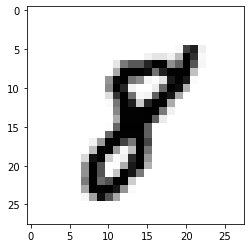

In [3]:
image_index = 17
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap = 'Greys')

Note the shape of x_train and x_test.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

Let us first flatten the 3D shape of x_train and x_test to a 2D shape where the the first dimension tells us about the number of training images, and the second dimension contains the total number of pixels (stacked).

In [6]:
x_train_flattened = np.reshape(x_train,(x_train.shape[0],-1))
x_test_flattened = np.reshape(x_test,(x_test.shape[0],-1))
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

Since the data is 'uint8' type, let us convert it to float32.

In [7]:
x_train_flattened = x_train_flattened.astype('float32')
x_test_flattened = x_test_flattened.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Here, we are normalizing the data. The maximum value of the pixel will be 255 (darkest). So divide by 255.

I also transpose the matrix because I want the second dimension to be the number of images. This dimnesion should be unaffected by the matrix multiplication.

In [8]:
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test_flattened/255
X_train = x_train_flattened.T
X_test = x_test_flattened.T

We also need to convert the labels into 1-hot encoded output so that its size matches with the output dimensions.

In [9]:
n_labels = 10
Y_true = np.zeros((n_labels,y_train.shape[0]))
Y_test = np.zeros((n_labels,y_test.shape[0]))

for i in range(len(y_train)):
    Y_true[int(y_train[i])][i] = 1
    
for i in range(len(y_test)):
    Y_test[int(y_test[i])][i] = 1

In [10]:
Y_true[:,0].reshape(10,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [11]:
Y_test[:,0].reshape(10,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

Now let us try to form the first nueron that links up the first layer.

In [12]:
W1 = np.zeros((1,X_train.shape[0]))
B1 = np.zeros((1,X_train.shape[0]))

In [13]:
Z = np.matmul(W1,X_train)
Z.shape

(1, 60000)

In Professor Ng's notes on Coursera, he uses a row-vector for X and dot multiplies each row of the weights matrix. I prefer to think of the W and X as matrices. Thus, I will keep X as a column vector and use matmul.

Now, we need to a non-linear activation function. There are various activation functions available like ReLU, tanh, sigmoid, etc. Let us define them below so that we can call them in future functions immediately.

In [14]:
def relu(z):
    return np.maximum(z,0)

In [15]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [16]:
def tanh(z):
    return np.tanh(z)

In [17]:
def atan(z):
    return np.arctan(z)

Also note that the last layer for multiple classification like our problem will be activated using a softmax function. Lets quickly create the softmax function and then get back to learning.

In [131]:
def softmax(z):
    return np.divide(np.exp(z-np.max(z,axis=0)+1e-6),np.sum(np.exp(z-np.max(z,axis=0)+1e-6),axis=0))

In the above example, we have a (3,2) system. For the real output, we will have a (10,60000) output. This is similar to what we need. The difference here is that we are classifying the data into 3 categories instead of 10. And we have 2 such examples instead of 60000.

Now that we have defined some non-linear functions to activate our single neuron, let us now use one of these functions.

This concluded the construction of 1 neuron. 

To create more neurons, we just need to add more rows to the weight matrix. The bias vector will now reflect the number of neurons in the next line. Thus, W has the shape of (number of layers in the next layer, number of inputs), B has the shape of (number of layers in the next layer, number of images). Note here that the second dimension of B can be left as 1, as Python can broadcast the vector.

In [19]:
next_layer = 10
W1 = np.zeros((next_layer,X_train.shape[0]))
B1 = np.zeros((1,X_train.shape[1]))

In [20]:
Z = np.matmul(W1,X_train) + B1

In [21]:
A = relu(Z)
A.shape

(10, 60000)

Let us try to put all of this in one function which we can call over and over if we want to create a nueral network.

What are the things that go into making a layer? We need weights, bias, and activation. Further, we need to know what we got as input and what we need to give as output.

Let us also keep a track of the network we create by creating a cache for weights and biases.

In [22]:
def nn_layer(X,next_layer,activation):
    W = np.random.rand(next_layer,X.shape[0])
    B = np.random.rand(next_layer,1)
    Z = np.matmul(W,X) + B
    cache = {'W': W, 'B':B}
    if activation == 'relu':
        return relu(Z)
    elif activation == 'tanh':
        return tanh(Z)
    elif activation == 'atan':
        return atan(Z)
    elif activation == 'sigmoid':
        return sigmoid(Z)
    elif activation == 'softmax':
        return softmax(Z)

In [23]:
op = nn_layer(X_train,10,'softmax')

In [24]:
op.shape

(10, 60000)

For a number of layers, it is not possible to set up a single function which is fast and flexible to accomodate for various neural network architectures. Thus, we have to incorporate a 'for' loop which will pass through the neural network architecture and create each layer and maintain a cache of all weights, biases, activations, etc.

To create a full network, we will need the input (of course!), the neural network architecture (number of neurons in each layer, their activations), a final layer to convert the data into the classification labels.

Just before we create the network, I want to create a quick function that reduces the if/else statements to one line in the main network. This is the 'activation_function'.

In [25]:
def activation_function(z,activation):
    if activation == 'relu':
        return relu(z)
    elif activation == 'tanh':
        return tanh(z)
    elif activation == 'atan':
        return atan(z)
    elif activation == 'sigmoid':
        return sigmoid(z)
    elif activation == 'softmax':
        return softmax(z)

In [26]:
def initialize_parameters(X,nn_architecture,nn_activations,learning_rate):
    cache = {}
    h_params = {'nn_arch': nn_architecture,
               'lr': learning_rate,
               'nn_acti': nn_activations}
    W = np.random.rand(nn_architecture[0],X.shape[0]) * 0.01
    B = np.random.rand(nn_architecture[0],1)
    cache.update({'W'+str(0): W, 'B'+str(0):B})
    for i in range(1,len(nn_architecture)):
        W = np.random.rand(nn_architecture[i],nn_architecture[i-1]) * 0.01
        B = np.random.rand(nn_architecture[i],1)
        cache.update({'W'+str(i): W, 'B'+str(i):B})
        
    return cache,h_params

In [27]:
def forward_nn_network(X,cache,h_params):
    A = X
    for i in range(len(h_params['nn_arch'])):
        X = A
        Z = np.matmul(cache['W'+str(i)],X) + cache['B'+str(i)]
        A = activation_function(Z,h_params['nn_acti'][i])
        cache.update({'A'+str(i): A,
                     'Z'+str(i): Z})
    return A,cache

Great! Now, we have successfully completed a forward pass on the network. Now comes the tough part, the learning part. Just before we jump into learning, we need to know if what we obtained was accurate or not.

There are a variety of ways to calculate the cost(loss) of the calculation. Boiled down to the basics, what we are trying to do is to reduce this cost function. Thus, using a good cost function is very important. So what are some cost functions?

Well, we already know some of them. Mean Absolute Error and Mean Squared Error are the most common ones. We have also seen Cross-Entropy function in most of the Deep Neural Network classes. I will define all of them in a function so that I don't have to think about them over and over again.

In [135]:
def cost_function(Y_pred,Y_true,cost):
    if cost == 'mae':
        return 1.0/Y_pred.shape[1] * np.sum(np.abs(Y_pred-Y_true),axis = 1,keepdims = True)
    elif cost == 'mse':
        return 0.5/Y_pred.shape[1] * np.sum((Y_pred-Y_true)**2,axis = 1,keepdims = True)
    elif cost == 'cross-entropy':
        if Y_pred.shape[0] == 2:
            return -1.0/Y_pred.shape[1] * np.sum(np.multiply(Y_true,np.log(Y_pred))+np.multiply((1.0-Y_true),np.log(1.0-Y_pred)),axis = 1, keepdims = True)
        else:
            return -1.0/Y_pred.shape[1] * np.sum(np.multiply(Y_true,np.log(Y_pred+1e-6)),axis = 1,keepdims = True)

Let us now focus on the learning. Starting with the 2 neuron to 1 neuron network. Find the derivative of the cost function with respect to the predictions.

In [29]:
def cost_function_derivative(Y_pred,Y_train,cost):
    if cost == 'mae':
        return 1.0/Y_pred.shape[1]
    elif cost == 'mse':
        return 1.0/Y_pred.shape[1] * (Y_pred - Y_train)
    elif cost == 'cross-entropy':
        if Y_pred.shape[0] == 2:
            return 1.0/Y_pred.shape[1] * np.divide((Y_pred-Y_train),((1-Y_pred)*(Y_pred)))
        else:
            return 1.0/Y_pred.shape[1] * np.divide(Y_train,Y_pred)

In [30]:
def activation_derivative(Z,activation):
    if activation == 'relu':
        return (lambda X: X>=0)(Z) * 1
    elif activation == 'atan':
        return 1.0/(Z**2 +1.0)
    elif activation == 'tanh':
        return 1.0-(tanh(Z))**2
    elif activation == 'sigmoid':
        return np.multiply(sigmoid(Z),1.0-sigmoid(Z))
    elif activation == 'softmax':
        return np.multiply(softmax(Z),np.eye(Z.shape[0])-softmax(Z))

Now that we have defined the derivative for the cost function, and the derivative for the activation, we need to know the derivative of the linear operation Z = WX + B with respect to W. Obviously, the derivative will be X. Thus, for the final layer, the value of W will be updated using the derivative of the cost function, activation function and the linear operation. For subsequent layers, this process will keep on multiplying to form the required matrix.

In [31]:
def backward_nn_network(X,Y_pred,Y_true,cost,cache,h_params):
    
    # Obtain the pre-multiplier (also dB)
    if h_params["nn_acti"][-1] == 'softmax' and cost == 'cross-entropy':
        pre_mul = Y_pred-Y_true
    else:
        # First find the derivatives for the cost function
        dJ = cost_function_derivative(Y_pred,Y_true,cost)
        # Then find the activation derivative for the last layer
        dA_dZ = activation_derivative(cache['A'+str(len(h_params['nn_arch'])-1)],h_params['nn_acti'][len(h_params['nn_arch'])-1])
        pre_mul = np.matmul(dJ.T,dA_dZ)
        
    # Obtain the dW and dB
    dW = np.matmul(pre_mul,cache['A'+str(len(h_params['nn_arch'])-2)].T)
    dB = np.sum(pre_mul,axis=1,keepdims=True)
    # Store it in a cache
    cache.update({'dW'+str(len(h_params['nn_arch'])-1): dW,
                 'dB'+str(len(h_params['nn_arch'])-1): dB})

    # Similarly for the middle layers
    for i in range(len(h_params['nn_arch'])-2,0,-1):
        pre_mul = np.matmul(cache['W'+str(i+1)].T,pre_mul)
        dA_dZ = activation_derivative(cache['A'+str(i)],h_params['nn_acti'][i])
        pre_mul = np.multiply(pre_mul,dA_dZ)
        dW = np.matmul(pre_mul,cache['A'+str(i-1)].T)
        dB = np.sum(pre_mul,axis=1,keepdims=True)
        cache.update({'dW'+str(i): dW,
                     'dB'+str(i): dB})

    # Similarly for the first layer
    pre_mul = np.matmul(cache['W'+str(1)].T,pre_mul)
    dA_dZ = activation_derivative(cache['A'+str(0)],h_params['nn_acti'][0])
    pre_mul = np.multiply(pre_mul,dA_dZ)
    dW = np.matmul(pre_mul,X.T)
    dB = np.sum(pre_mul,axis=1,keepdims=True)
    cache.update({'dW'+str(0): dW,
                 'dB'+str(0): dB})
    
    return cache

In [32]:
def update_weights(cache,h_params):
    for i in range(len(h_params['nn_arch'])):
        cache['W'+str(i)] -= cache['dW'+str(i)] * h_params['lr']
        cache['B'+str(i)] -= cache['dB'+str(i)] * h_params['lr']
    return cache

Now we have the tools for a Neural Network. Let us create a run which would compute what we need and see it run for one full iteration on its own.

In [33]:
def nn_network(X,Y_true,nn_arachitecture,nn_activations,cost,learning_rate,n_epoch):
    cache,h_params = initialize_parameters(X,nn_architecture,nn_activations,learning_rate)
    cost = []
    for i in range(n_epoch):
        Y_pred,cache = forward_nn_network(X,cache,h_params)
        loss = cost_function(Y_pred,Y_true,cost)
        print(np.sum(loss))
        cache = backward_nn_network(X,Y_pred,Y_true,cost,cache,h_params)
        cache = update_weights(cache,h_params)
        cost.append(np.sum(loss))
        
    return cache,h_params,np.sum(loss)

Now, we can try the run the above code as a script.

The shape of the network is given by 786-25-10. 786 is the input layer, 25 is the hidden one, 10 is the output layer. The size of the output layer is given by the size of Y. The output of each layer goes through a non-linear function to include the non-linearity.

In [34]:
cache1,h_params1 = initialize_parameters(X_train,[25,10],['sigmoid','softmax'],1e-4)
cost1 = []
for i in range(10):
    Y_pred1,cache1 = forward_nn_network(X_train,cache1,h_params1)
    loss1 = cost_function(Y_pred1,Y_true,'cross-entropy')
    if i % 1 == 0:
        print(np.sum(loss1))
    cache1 = backward_nn_network(X_train,Y_pred1,Y_true,'cross-entropy',cache1,h_params1)
    cache1 = update_weights(cache1,h_params1)
    cost1.append(np.sum(loss1))

2.360035293746627
4.054977344529237
2.7035065436068466
2.4040635672401414
2.3379261678581913
2.3123018534179858
2.303891183372144
2.301680573881721
2.3011533333312473
2.301138644182368


In [35]:
h_params1["lr"] = 1e-5

In [47]:
for i in range(1000):
    Y_pred1,cache = forward_nn_network(X_train,cache1,h_params1)
    loss1 = cost_function(Y_pred1,Y_true,'cross-entropy')
    if i % 10 == 0:
        print(np.sum(loss1))
    cache1 = backward_nn_network(X_train,Y_pred1,Y_true,'cross-entropy',cache1,h_params1)
    cache1 = update_weights(cache1,h_params1)
    cost1.append(np.sum(loss1))

1.2024218229650654
1.1895021298082096
1.1768336265588977
1.164460110963645
1.152432857326249
1.1407172183617944
1.1292144453059016
1.1180074013358532
1.107274194755957
1.0970087625819676
1.0870916405893503
1.0774034927843654
1.0679130238007575
1.0586885934999442
1.0497976060448833
1.041238150602744
1.0329695585842047
1.0249231790920428
1.0171064135714694
1.0094619916688032
1.0020070489676645
0.9947702230915085
0.9876718123503082
0.9807602110743803
0.9740809412601484
0.9676337086050344
0.9613969825827418
0.955311536368718
0.9493306488808592
0.9434355423109904
0.9376258930230777
0.9319032973096005
0.926317710956761
0.9208755202023449
0.9155444231821296
0.9103470861129247
0.9053730135847858
0.900631648159126
0.8960637511940569
0.8916085125142439
0.8872423375412688
0.8830208892561872
0.8788822650490562
0.8748403874485782
0.8708317288087327
0.8668297681513194
0.8628552224020951
0.8588636943818276
0.8548671642684833
0.8508315835612402


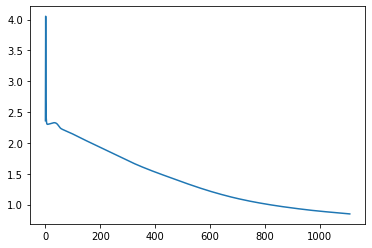

In [48]:
plt.plot(cost1)

[3.]
[0 0 0 1 0 0 0 0 0 0]


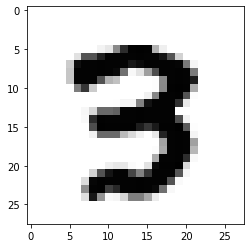

In [49]:
image_index = 25377
print(y_train[image_index])
print((Y_pred1[:,image_index] >= np.max(Y_pred1[:,image_index])) * 1)
plt.imshow(x_train[image_index],cmap = 'Greys')

To get the accuracy of the network, we can take the values of the output and assign 1 to the highest output and make all others 0. Now, if we subtract that from the true values, we should be left with 0s whenever the answer is correct. If the prediction is incorrect, we will be left with 2 ones (+1 and -1) in that column. But that does not mean we are twice wrong. So to counter this problem, we take the absolute and divide by 2. Now, we can add all the entries in one column and do that for the size of the dataset. Thus, if the prediciton is correct, we will have a sum of 0, if not, we will sum to 1.

$ output =
\left\{
	\begin{array}{ll}
		0  & \mbox{if } prediction = true value \\
		1 & \mbox{if } prediction \neq true value
	\end{array}
\right.$

Now, if the answers are correct, the particular value we described should be 0 or close to it. Accuracy, however, is measured as the correctness of the solution and generally, higher the accuracy, the better the solution. In our case, we do not have that (answer tends to 0 when we are correct and tends to 1 when we are not). To flip the thing around, subtract the particular value from 1 (100%). Now, if we are correct, the answer will be 1 or close to it.

In [50]:
accuracy_train = (1-np.sum(np.abs((Y_pred1 >= np.max(Y_pred1,axis=0)) * 1 - Y_true))/2/Y_true.shape[1]) * 100
print(accuracy_train)

72.37


So, a simple Neural Network with one hidden layer of 25 neurons, which I ran for about 1000 passes gave me an accuracy of 72.37% on the training set. That is pretty good. Can we do better? Surely. What can we do to make it better? There are too many hyperparameters to play with.

But first, let us see if this network does any good on the test set.

Here, we are going to take the [786,10000] test set and run it through the Neural Network.

In [51]:
Y_pred_test,cache_test = forward_nn_network(X_test,cache1,h_params1)

[2.]
[0 0 1 0 0 0 0 0 0 0]


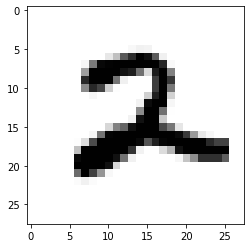

In [52]:
image_index = 6754
print(y_test[image_index])
print((Y_pred_test[:,image_index] >= np.max(Y_pred_test[:,image_index])) * 1)
plt.imshow(x_test[image_index],cmap = 'Greys')

In [88]:
accuracy_test = (1-np.sum(np.abs((Y_pred_test >= np.max(Y_pred_test,axis=0)) * 1 - Y_test))/2/Y_test.shape[1]) * 100
print(accuracy_test)

72.88


Thus, our Neural Network is predicting the numbers with 72.88% accuracy for the test set. That is incredible!

Note here that I did play around with the learning rate. I started off with $lr = 10^{-4}$ and then changed it to $lr=10^{-5}$ as I felt the weights were going in the right direction.

The next challenge is to improve this model to get higher accuracy.